## Grantecan Control System Following Error Dataset

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

%matplotlib inline

In [86]:
df = pd.read_csv('./March_2021_FollowingError.csv.gz')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df['TimeStampLong'] = pd.to_datetime(df['TimeStampLong'], errors='coerce')
df.head()



,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,ECS.UpperShutter.actualPosition,ECS.DomeRotation.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,OE.ObservingEngine.currentObservingState
0,2021-03-01 20:02:23.984515,160.041838,0.000007,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,SLEWING
1,2021-03-01 20:02:24.011984,160.041838,-0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,SLEWING
2,2021-03-01 20:02:24.283479,160.041838,-0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,TRACKING
3,2021-03-01 20:02:24.383485,160.041838,-0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,SLEWING
4,2021-03-01 20:02:24.412000,160.041838,0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,SLEWING


In [87]:
df.describe()

,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,ECS.UpperShutter.actualPosition,ECS.DomeRotation.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB
count,1.378117e+06,1.378117e+06,1.378117e+06,1.378117e+06,1.378117e+06,1.378117e+06,1.378117e+06,1.378117e+06,1.378117e+06
mean,6.702676e+01,7.991279e-06,5.230145e+01,7.236775e+01,1.865423e+02,6.459244e+00,1.948799e+02,-1.384786e-06,-3.796617e-07
std,1.075110e+02,7.060666e-04,1.762538e+01,3.307321e+01,1.217129e+02,3.044289e+00,7.238008e+01,1.320419e-17,2.900824e-18
min,-1.713218e+02,-3.941475e-03,-1.467939e+02,0.000000e+00,0.000000e+00,3.991667e-01,0.000000e+00,-1.384786e-06,-3.796617e-07
25%,-7.450403e+00,-1.737434e-05,4.112397e+01,8.750800e+01,7.852260e+01,4.239567e+00,1.530000e+02,-1.384786e-06,-3.796617e-07
50%,3.165974e+01,0.000000e+00,5.460565e+01,8.793780e+01,1.889410e+02,6.246656e+00,1.750000e+02,-1.384786e-06,-3.796617e-07
75%,1.529856e+02,1.760436e-05,6.335491e+01,8.794730e+01,3.194950e+02,8.599044e+00,2.380000e+02,-1.384786e-06,-3.796617e-07
max,3.546856e+02,3.990809e-03,8.991068e+01,8.795200e+01,3.599990e+02,1.458531e+01,3.590000e+02,-1.384786e-06,-3.796617e-07


In [295]:
azimuth_position_vals = df.groupby(pd.cut(df['MACS.AzimuthAxis.position'], np.arange(-175.7, 355.7, 20)))['MACS.AzimuthAxis.position'].count()

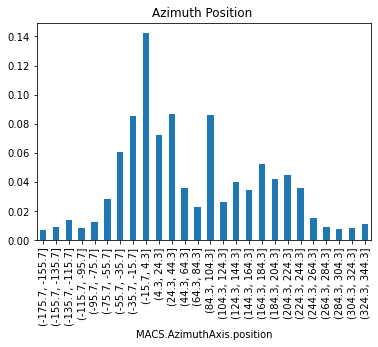

In [296]:
(azimuth_position_vals/df.shape[0]).plot(kind="bar");
plt.title("Azimuth Position ");

In [297]:
elevation_position_vals = df.groupby(pd.cut(df['MACS.ElevationAxis.position'], np.arange(0, 90, 5)))['MACS.ElevationAxis.position'].count()

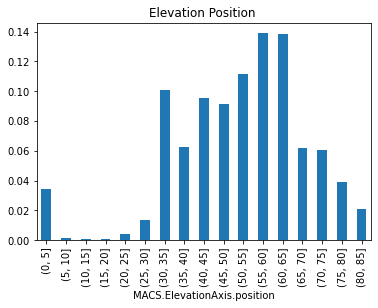

In [298]:
(elevation_position_vals/df.shape[0]).plot(kind="bar");
plt.title("Elevation Position ");

In [299]:
dome_rotation_vals = df.groupby(pd.cut(df['ECS.DomeRotation.actualPosition'], np.arange(0, 90, 5)))['ECS.DomeRotation.actualPosition'].count()

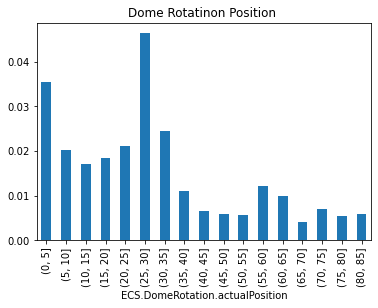

In [300]:
(dome_rotation_vals/df.shape[0]).plot(kind="bar");
plt.title("Dome Rotatinon Position ");

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

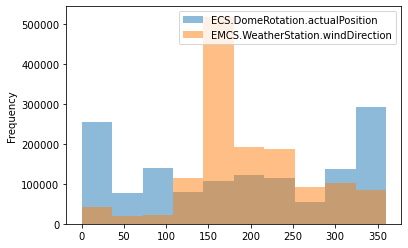

In [301]:
plt.figure()
df[[ 'ECS.DomeRotation.actualPosition','EMCS.WeatherStation.windDirection']].plot(kind='hist', alpha=0.5)

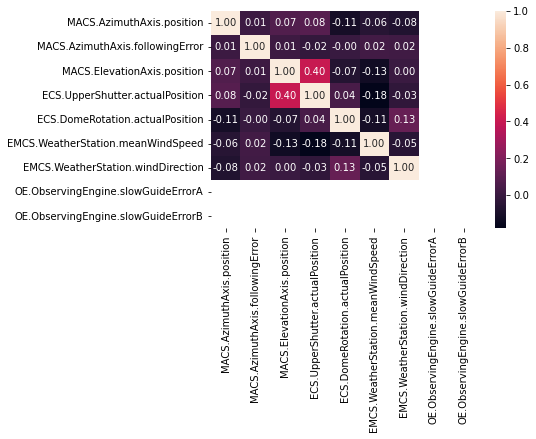

In [302]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [88]:
 df = df[( df['OE.ObservingEngine.currentObservingState'] =='TRACKING' )  | ( df['OE.ObservingEngine.currentObservingState'] =='GUIDING' )]

In [4]:
df.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,ECS.UpperShutter.actualPosition,ECS.DomeRotation.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,OE.ObservingEngine.currentObservingState
2,2021-03-01 20:02:24.283479,160.041838,-0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,TRACKING
621,2021-03-01 20:04:24.183554,208.412906,-0.000002,67.592320,87.937798,207.654007,7.160711,166.0,-0.000001,-3.796617e-07,TRACKING
622,2021-03-01 20:04:24.518902,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,166.0,-0.000001,-3.796617e-07,TRACKING
623,2021-03-01 20:04:25.643062,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,170.0,-0.000001,-3.796617e-07,TRACKING
624,2021-03-01 20:04:28.643119,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,162.0,-0.000001,-3.796617e-07,TRACKING


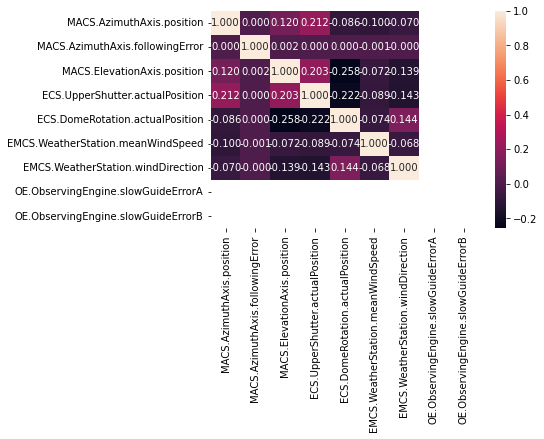

In [305]:
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [306]:
dome_rotation_vals = df.groupby(pd.cut(df['MACS.ElevationAxis.position'], np.arange(0,90, 5)))['MACS.AzimuthAxis.followingError'].max()

In [307]:
print(dome_rotation_vals)

MACS.ElevationAxis.position
(0, 5]           NaN
(5, 10]          NaN
(10, 15]         NaN
(15, 20]         NaN
(20, 25]    0.001567
(25, 30]    0.000315
(30, 35]    0.003556
(35, 40]    0.002135
(40, 45]    0.002129
(45, 50]    0.003835
(50, 55]    0.002158
(55, 60]    0.002335
(60, 65]    0.002916
(65, 70]    0.002314
(70, 75]    0.002162
(75, 80]    0.001874
(80, 85]    0.002728
Name: MACS.AzimuthAxis.followingError, dtype: float64


In [308]:
df.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,ECS.UpperShutter.actualPosition,ECS.DomeRotation.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,OE.ObservingEngine.currentObservingState
2,2021-03-01 20:02:24.283479,160.041838,-0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,TRACKING
621,2021-03-01 20:04:24.183554,208.412906,-0.000002,67.592320,87.937798,207.654007,7.160711,166.0,-0.000001,-3.796617e-07,TRACKING
622,2021-03-01 20:04:24.518902,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,166.0,-0.000001,-3.796617e-07,TRACKING
623,2021-03-01 20:04:25.643062,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,170.0,-0.000001,-3.796617e-07,TRACKING
624,2021-03-01 20:04:28.643119,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,162.0,-0.000001,-3.796617e-07,TRACKING


In [325]:
from datetime import datetime, timedelta
df =df [ df['TimeStampLong'].diff() > timedelta(seconds = 1) ]

<AxesSubplot:>

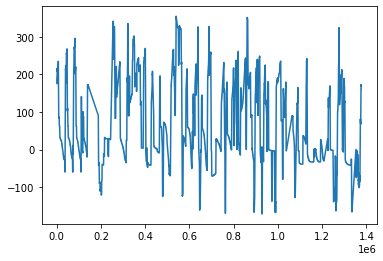

In [326]:
df['MACS.AzimuthAxis.position'].plot.line()

<AxesSubplot:>

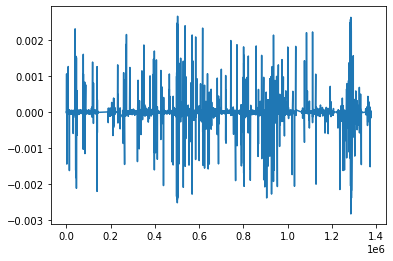

In [328]:
df['MACS.AzimuthAxis.followingError'].plot.line()

In [355]:
df

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,ECS.UpperShutter.actualPosition,ECS.DomeRotation.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,OE.ObservingEngine.currentObservingState
2,2021-03-01 20:02:24.283479,160.041838,-0.000019,30.082957,87.937798,159.298004,7.160711,160.0,-0.000001,-3.796617e-07,TRACKING
621,2021-03-01 20:04:24.183554,208.412906,-0.000002,67.592320,87.937798,207.654007,7.160711,166.0,-0.000001,-3.796617e-07,TRACKING
622,2021-03-01 20:04:24.518902,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,166.0,-0.000001,-3.796617e-07,TRACKING
623,2021-03-01 20:04:25.643062,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,170.0,-0.000001,-3.796617e-07,TRACKING
624,2021-03-01 20:04:28.643119,208.412906,-0.000002,67.592320,87.937798,208.158005,7.160711,162.0,-0.000001,-3.796617e-07,TRACKING
...,...,...,...,...,...,...,...,...,...,...,...
1376851,2021-04-01 06:26:04.843940,172.335229,-0.000012,63.195021,87.942001,171.378998,2.852922,108.0,-0.000001,-3.796617e-07,GUIDING
1376852,2021-04-01 06:26:07.843919,172.335229,-0.000012,63.195021,87.942001,171.378998,2.852922,100.0,-0.000001,-3.796617e-07,GUIDING
1376853,2021-04-01 06:26:09.334434,172.335229,0.000012,63.195021,87.942001,171.378998,2.852922,100.0,-0.000001,-3.796617e-07,GUIDING
1376854,2021-04-01 06:26:10.843959,172.335229,0.000012,63.195021,87.942001,171.378998,2.852922,98.0,-0.000001,-3.796617e-07,GUIDING


In [ ]:





#for val, cnt in df.groupby(df['MACS.AzimuthAxis.position'].diff().cumsum()).value_counts().iteritems():
#    print ('value', val, 'was found', cnt, 'times')
#    break

In [ ]:
sns.heatmap(dfdif.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
dfdif['MACS.AzimuthAxis.followingError'].plot.line()

In [ ]:
dfdif['MACS.AzimuthAxis.position'].plot.line()

In [ ]:
df

In [89]:
df_foll = df[ abs(df['MACS.AzimuthAxis.followingError'])>=2e-3 ]

In [90]:
plt.rcParams["figure.figsize"] = (11,5)

<AxesSubplot:xlabel='TimeStampLong', ylabel='MACS.AzimuthAxis.followingError'>

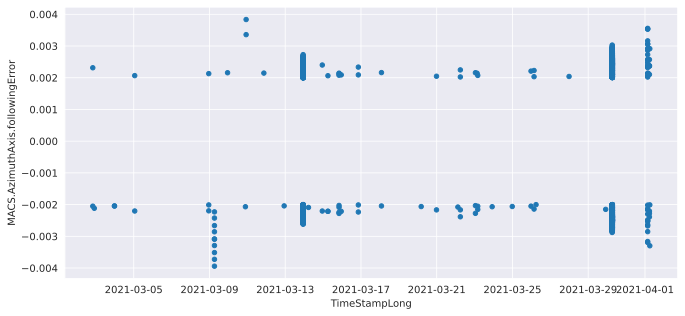

In [91]:
df_foll.plot.scatter(x='TimeStampLong',y='MACS.AzimuthAxis.followingError')


In [92]:
df_foll

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,ECS.UpperShutter.actualPosition,ECS.DomeRotation.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,OE.ObservingEngine.currentObservingState
39386,2021-03-02 20:05:07.762909,212.617253,0.002314,67.281547,87.949203,210.360001,3.224233,242.0,-0.000001,-3.796617e-07,TRACKING
39388,2021-03-02 20:05:08.014672,212.617253,-0.002050,67.281547,87.949203,210.360001,3.224233,242.0,-0.000001,-3.796617e-07,TRACKING
45295,2021-03-02 22:00:34.263042,262.872929,-0.002116,57.883131,87.949203,261.584015,2.206078,201.0,-0.000001,-3.796617e-07,TRACKING
87228,2021-03-03 23:34:44.411985,62.908556,-0.002044,46.879373,87.937798,63.659698,4.708033,188.0,-0.000001,-3.796617e-07,TRACKING
87229,2021-03-03 23:34:44.518903,62.908556,-0.002044,46.879373,87.937798,63.149899,4.708033,188.0,-0.000001,-3.796617e-07,TRACKING
...,...,...,...,...,...,...,...,...,...,...,...
1373395,2021-04-01 05:37:24.134270,72.088624,-0.002206,80.258396,87.942001,72.892502,2.852922,67.0,-0.000001,-3.796617e-07,GUIDING
1373397,2021-04-01 05:37:24.534270,72.088624,0.002377,80.258396,87.942001,72.892502,2.852922,67.0,-0.000001,-3.796617e-07,GUIDING
1375775,2021-04-01 06:05:48.934271,162.328918,-0.002009,63.737400,87.942001,161.460999,2.852922,90.0,-0.000001,-3.796617e-07,GUIDING
1375776,2021-04-01 06:05:49.134275,162.328918,-0.003298,63.737400,87.942001,161.460999,2.852922,90.0,-0.000001,-3.796617e-07,GUIDING


In [93]:
pd.date_range('2021-03-15', periods=2, freq='D')

DatetimeIndex(['2021-03-15', '2021-03-16'], dtype='datetime64[ns]', freq='D')

In [94]:
df_foll_1 = df_foll.loc[(df_foll.TimeStampLong>'2021-03-13') & (df_foll.TimeStampLong<'2021-03-14')]

<AxesSubplot:xlabel='TimeStampLong', ylabel='MACS.AzimuthAxis.followingError'>

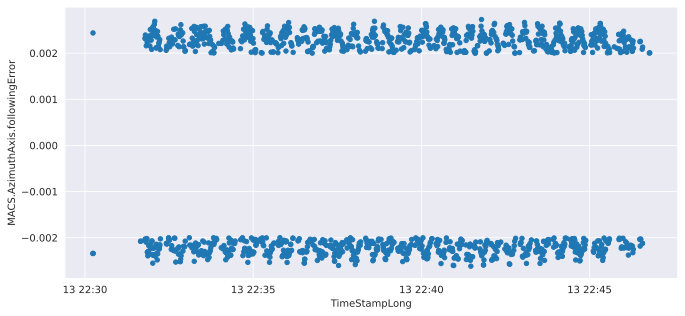

In [95]:
df_foll_1.plot.scatter(x='TimeStampLong',y='MACS.AzimuthAxis.followingError')

In [ ]:
sns.heatmap(df_foll.corr(), annot=True, fmt=".3f")
plt.show()

In [ ]:
elevation_position_vals = df_foll.groupby(pd.cut(df_foll['MACS.ElevationAxis.position'], np.arange(0, 90, 2)))['MACS.ElevationAxis.position'].count()

In [ ]:
(elevation_position_vals/df.shape[0]).plot(kind="bar");
plt.title("Elevation Position ");

In [ ]:
azimuth_position_vals = df_foll.groupby(pd.cut(df_foll['MACS.AzimuthAxis.position'], np.arange(-175.7, 355.7, 50)))['MACS.AzimuthAxis.position'].count()

In [ ]:
(azimuth_position_vals/df.shape[0]).plot(kind="bar");
plt.title("Aximuth Position ");

In [ ]:
plt.figure()
df_foll[[ 'ECS.DomeRotation.actualPosition','EMCS.WeatherStation.windDirection']].plot(kind='hist', alpha=0.5)

In [106]:
elevation_position_vals = df_foll.groupby(pd.cut(df_foll['MACS.ElevationAxis.position'], np.arange(0, 90, 2)))['MACS.ElevationAxis.position'].count()

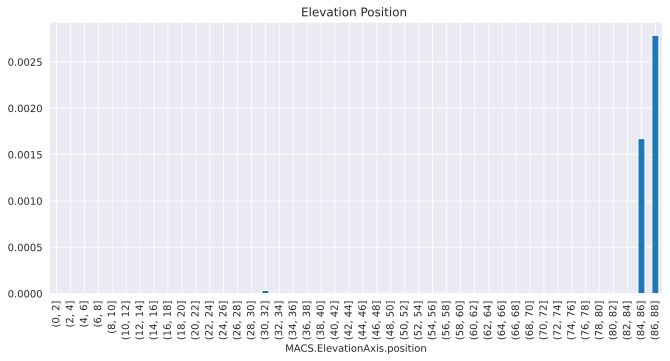

In [107]:
(elevation_position_vals/df.shape[0]).plot(kind="bar");
plt.title("Elevation Position ");

In [129]:
azimuth_position_vals = df_foll.groupby(pd.cut(df_foll['MACS.AzimuthAxis.position'], np.arange(-175.7, 355.7, 50)))['MACS.AzimuthAxis.position'].count()

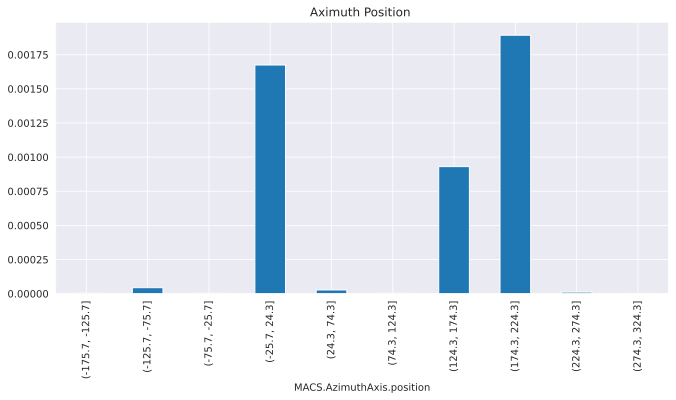

In [131]:
(azimuth_position_vals/df.shape[0]).plot(kind="bar");
plt.title("Aximuth Position ");

<AxesSubplot:ylabel='Frequency'>

<Figure size 792x360 with 0 Axes>

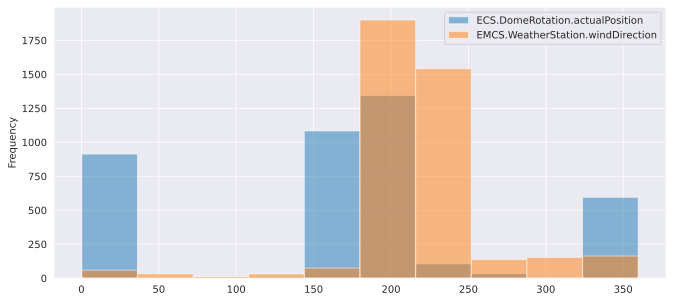

In [126]:
plt.figure()
df_foll[[ 'ECS.DomeRotation.actualPosition','EMCS.WeatherStation.windDirection']].plot(kind='hist', alpha=0.5)